# _Clustering - Kümeleme_

_Clustering benzer nesnelerin veya verilerin gruplar halinde toplanması demektir._ <br>
_Bu projede arabaları benzerliklerine göre grulara ayıracağız_

#### _İmport_

In [1]:
import pandas as pd
# Veri analizi ve tablo işlemleri için kullanılır.

import warnings
warnings.filterwarnings('ignore')
# Çalışma sırasında çıkan uyarı mesajlarını gizler.

import matplotlib.pyplot as plt
import seaborn as sns
# Grafik ve görselleştirme işlemleri için kullanılır.


In [2]:
from sklearn.cluster import KMeans
# KMeans algoritmasını kullanarak veri kümelerini (cluster) oluşturmak için kullanılır.

from sklearn.metrics import silhouette_score
# Kümeleme başarısını ölçmek için kullanılan Silhouette (gölge) skorunu hesaplar.

In [3]:
from yellowbrick.cluster import KElbowVisualizer

# KMeans için en uygun küme (cluster) sayısını belirlemeye yardımcı olan görselleştirme aracıdır.

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme (hierarchical clustering) için kullanılır.
# 'linkage' kümeler arası mesafeyi hesaplar, 'dendrogram' ise bu yapıyı görselleştirir.

In [5]:
from sklearn.cluster import DBSCAN

# Yoğunluk tabanlı kümeleme (Density-Based Spatial Clustering) algoritmasını kullanmak için.
# Gürültülü (outlier) verilerde etkili bir kümeleme yöntemidir.

In [6]:
import numpy as np
# Sayısal işlemler ve dizi (array) yapıları için kullanılır.

from sklearn.datasets import make_blobs
# Kümeleme örnekleri için yapay (örnek) veri setleri oluşturur.

from scipy.cluster.hierarchy import dendrogram, linkage
# Hiyerarşik kümeleme işlemleri için kullanılır.
# 'linkage' kümeler arası mesafeyi hesaplar, 'dendrogram' küme yapısını görselleştirir.


In [7]:
from sklearn.preprocessing import StandardScaler
# Verileri ölçeklendirmek (standartlaştırmak) için kullanılır.
# Özelliklerin ortalamasını 0, standart sapmasını 1 yapar.

from sklearn.cluster import AgglomerativeClustering
# Hiyerarşik (aşağıdan yukarıya) kümeleme algoritmasını uygulamak için kullanılır.


#### _EDA_

In [8]:
df=pd.read_excel('cars.xls')

# 'cars.xls' adlı Excel dosyasını okur ve veriyi DataFrame olarak 'df' değişkenine yükler.

In [9]:
df.sample()

# Veri setinden rastgele bir satır getirir, genel yapıyı hızlıca görmek için kullanılır.

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
14,19774.249066,23359,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,1,1


_Hatırlatma;_ <br>
_Regression için r2_score ve RMSE Classification in Accuracy, precision, recall f1-score Clustering silhouette score_

#### _K-Means Clustering_

In [10]:
x = df[['Price', 'Mileage', 'Cylinder']]

# Veri setinden sadece 'Price', 'Mileage' ve 'Cylinder' sütunlarını seçer.
# Bu sütunlar kümeleme analizinde kullanılacak değişkenlerdir.

In [11]:
model=KMeans(4)

# 4 kümeli bir KMeans modeli oluşturur

In [12]:
model=model.fit(x)

# Modeli verilerle eğitir (küme merkezlerini hesaplar).

In [13]:
tahmin=model.predict(x)

# Her gözlemin hangi kümeye ait olduğunu tahmin eder.

In [14]:
x['cluster']=tahmin

# Tahmin edilen küme etiketlerini 'cluster' adlı yeni bir sütun olarak ekler.

In [15]:
x.head()

# İlk 5 satırı görüntüler, kümelenmiş verinin yapısını görmek için kullanılır.

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,2


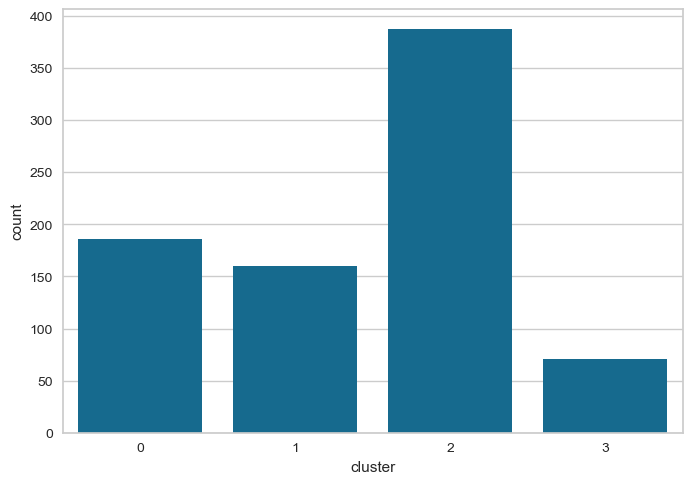

In [16]:
sns.countplot(x=x['cluster']);

# Her kümede kaç örnek (veri noktası) olduğunu çubuk grafikte gösterir.

In [17]:
silhouette_score(x, tahmin)

# Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.
# Skor 1'e yaklaştıkça kümeler daha belirgin ve başarılıdır.

np.float64(0.4127103000685562)

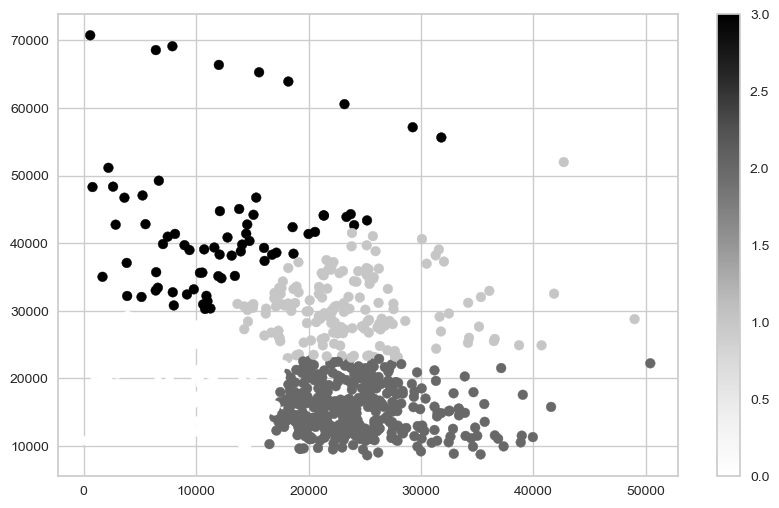

In [18]:
plt.figure(figsize=(10,6))
# Grafik boyutunu 10x6 inç olarak ayarlar.

plt.scatter(x.Mileage, x.Price, c=tahmin)
# Mileage (x ekseni) ve Price (y ekseni) değerlerine göre noktaları çizer.
# 'c=tahmin' parametresi, her noktanın rengini ait olduğu kümeye göre belirler.

plt.colorbar();
# Grafik yanına renk skalası ekler, böylece hangi renk hangi kümeyi temsil ediyor görülebilir.

In [19]:
# wcss = within cluster sum of squares (küme içi kareler toplamı)
wcss = []  # Her küme sayısı için WCSS değerlerini saklayacak liste
ss = []    # Her küme sayısı için Silhouette skorlarını saklayacak liste

for i in range(2, 10):
    model = KMeans(i)
    # i sayıda küme olacak şekilde KMeans modelini oluşturur.

    model = model.fit(x)
    # Modeli verilerle eğitir (küme merkezlerini hesaplar).

    tahmin = model.predict(x)
    # Her gözlemin hangi kümeye ait olduğunu tahmin eder.

    ssl = silhouette_score(x, tahmin)
    # Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.

    ss.append(ssl)
    # Hesaplanan Silhouette skorunu listeye ekler.

    print(ssl)
    # Her iterasyonda Silhouette skorunu ekrana yazdırır.

    wcss.append(model.inertia_)
    # KMeans modelinin küme içi hata kareleri toplamını (inertia_) listeye ekler.

0.45104089055857427
0.40339248083258655
0.4146371468142279
0.38238764127759894
0.35664953440352226
0.32771289251851893
0.3612681618347925
0.34874086518165415


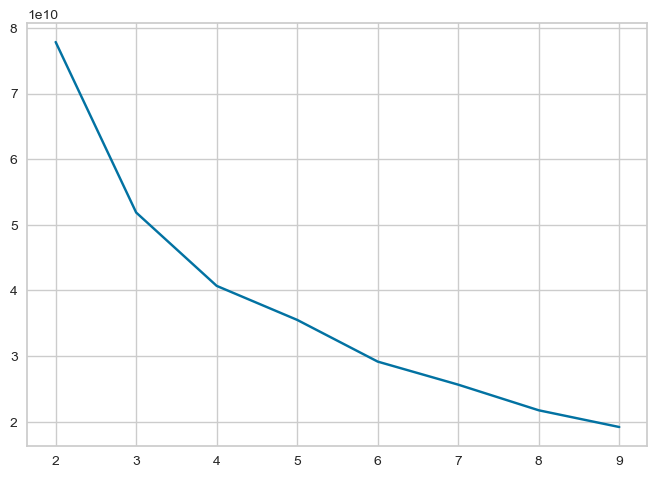

In [20]:
plt.plot(range(2,10), wcss);

# 2'den 9'a kadar olan küme sayıları için WCSS değerlerini çizer.
# Grafikteki “dirsek” (elbow) noktasının kırıldığı yer,
# en uygun küme sayısını (optimum cluster sayısı) gösterir.

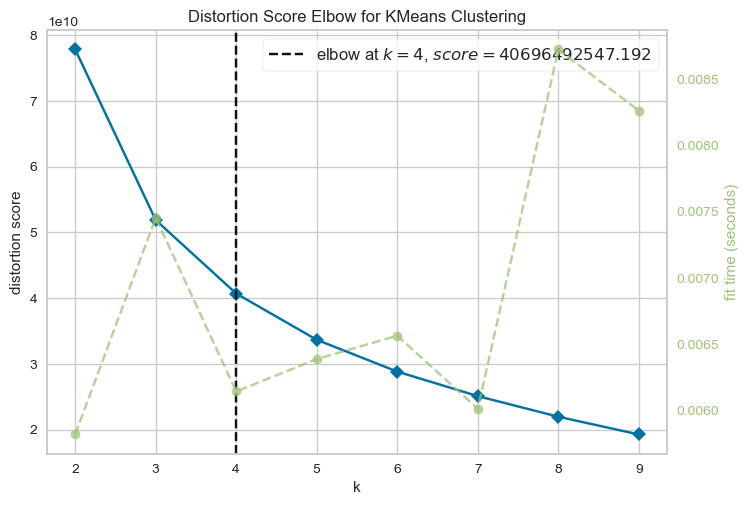

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
vis = KElbowVisualizer(KMeans(), k=(2,10))
# 2 ile 10 arasındaki küme sayıları için KMeans modelini değerlendirir.
# En uygun küme sayısını (elbow noktasını) otomatik olarak bulmak için görselleştirici oluşturur.

vis.fit(x)
# Veriyi modele uygular ve her küme sayısı için WCSS değerlerini hesaplar.

vis.show()
# Elbow (dirsek) grafiğini ekranda gösterir.

# _Hierarchical Clustering_

In [22]:
data = linkage(x, method='ward', metric='euclidean')

# Hiyerarşik kümeleme için bağlantı (linkage) matrisi oluşturur.
# 'ward' yöntemi, kümeler arası varyansı minimize ederek birleştirme yapar.
# 'euclidean' ise öklid (doğrusal) uzaklık ölçüsünü kullanır.

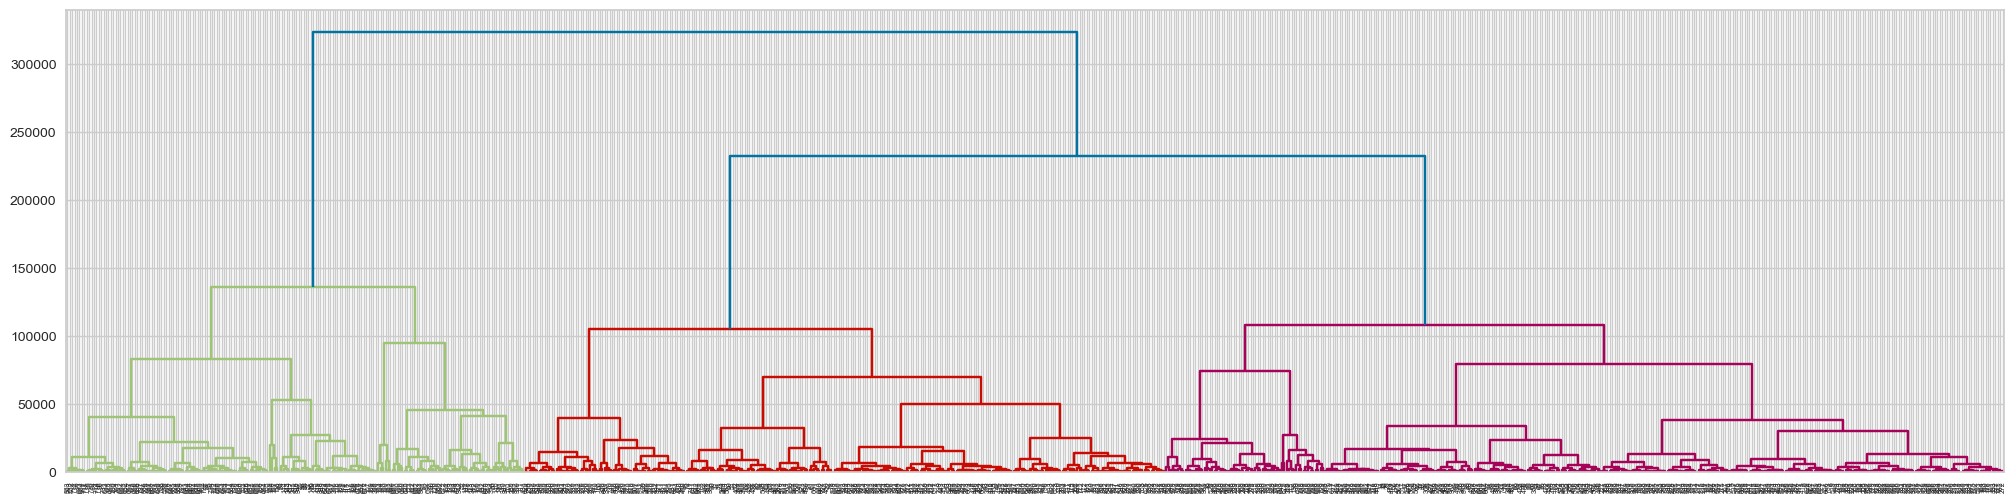

In [23]:
plt.figure(figsize=(25,6))
# Grafiğin boyutunu geniş (25x6 inç) olarak ayarlar, dalları rahat görmek için.

dendrogram(data);
# Hiyerarşik kümeleme sonucunu ağaç yapısında (dendrogram) görselleştirir.
# Dalların birleştiği yükseklikler kümeler arası mesafeyi gösterir.

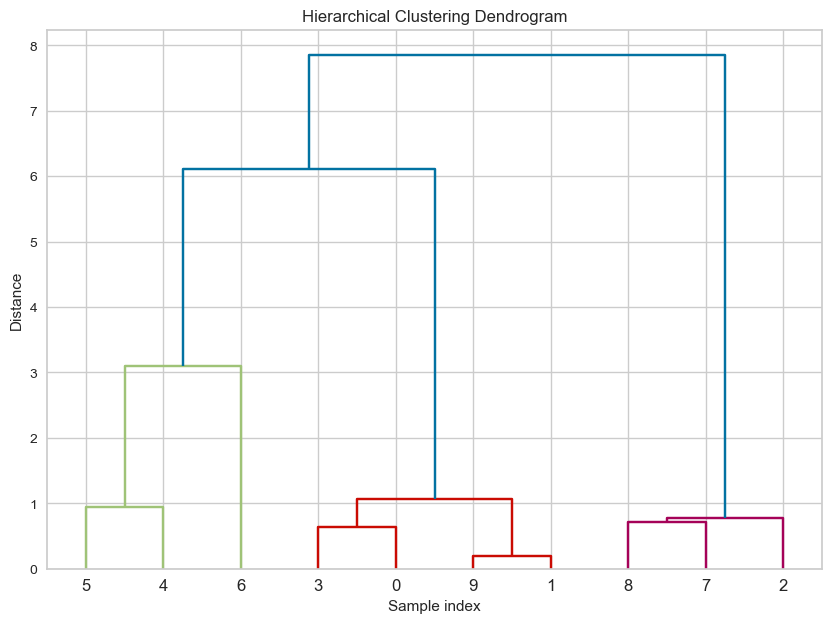

In [24]:
# Örnek veri oluşturma (çalıştığımız data ile alakalı değil)
X, _ = make_blobs(n_samples=10, centers=3, cluster_std=0.60, random_state=0)
# 10 örnekten oluşan, 3 merkezli (küme) yapay bir veri seti oluşturur.
# cluster_std küme yayılımını, random_state ise tekrarlanabilirliği sağlar.

# Hiyerarşik kümeleme uygulama
linked = linkage(X, 'ward')
# 'ward' yöntemiyle kümeler arası varyansı minimize ederek bağlantı matrisi oluşturur.

# Dendrogram (ağaç grafiği) çizimi
plt.figure(figsize=(10, 7))
# Grafik boyutunu 10x7 inç olarak ayarlar.

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
# Hiyerarşik kümeleme sonuçlarını görselleştirir.
# orientation='top' dalların yukarıdan aşağı çizilmesini sağlar.
# distance_sort='descending' büyük mesafelere göre sıralar.
# show_leaf_counts=True, her dalda kaç örnek olduğunu gösterir.

plt.title('Hierarchical Clustering Dendrogram') # Grafiğe başlık ekler.
plt.xlabel('Sample index') # X eksenine örnek indekslerini belirtir.
plt.ylabel('Distance') # Y eksenine kümeler arası mesafeyi belirtir.
plt.show() # Grafiği ekranda gösterir.

#### _DBSCAN Clustering_

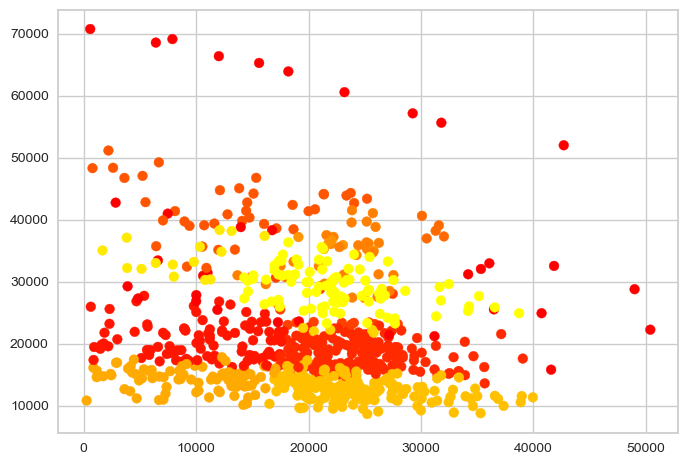

In [25]:
db = DBSCAN(min_samples=5)
# DBSCAN (yoğunluk tabanlı kümeleme) modelini oluşturur.
# min_samples=5: Bir küme oluşması için en az 5 nokta gereklidir.

x2 = StandardScaler().fit_transform(x)
# Veriyi ölçeklendirir (ortalama=0, standart sapma=1) — DBSCAN uzaklığa duyarlı olduğu için önemlidir.

y = db.fit_predict(x2)
# DBSCAN modelini uygular ve her örneğe ait küme etiketini tahmin eder.
# Gürültü (outlier) noktaları genellikle -1 etiketiyle gösterilir.

plt.scatter(x['Mileage'], x['Price'], c=y, cmap='autumn');
# Mileage ve Price değerlerine göre noktaları çizer.
# 'c=y' kümelere göre renklendirir, 'autumn' renk haritası kullanılır.

plt.savefig('clustering.png', dpi=300)
# Grafiği 'clustering.png' adıyla kaydeder, 300 dpi çözünürlükte.

#### _Agglomerative Clustering_

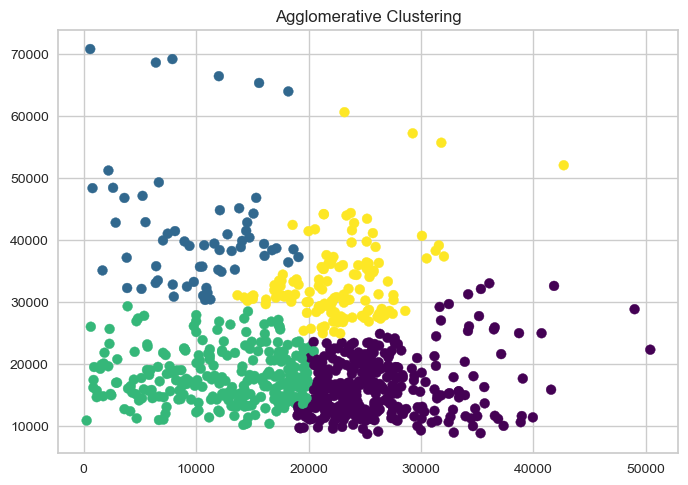

In [26]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
# 4 kümeli hiyerarşik (aşağıdan yukarıya) kümeleme modeli oluşturur.

y_agg = agg_clustering.fit_predict(x)
# Veriyi modele uygular ve her gözlemin hangi kümeye ait olduğunu tahmin eder.

# Sonuçları görselleştirme
plt.scatter(x.Mileage, x.Price, c=y_agg, s=50, cmap='viridis')
# Mileage ve Price değerlerine göre noktaları çizer.
# 'c=y_agg' kümelere göre renklendirme yapar.
# 's=50' nokta boyutunu, 'cmap="viridis"' renk paletini belirler.

plt.title("Agglomerative Clustering")
# Grafiğe başlık ekler.

plt.show()
# Grafiği ekranda gösterir.

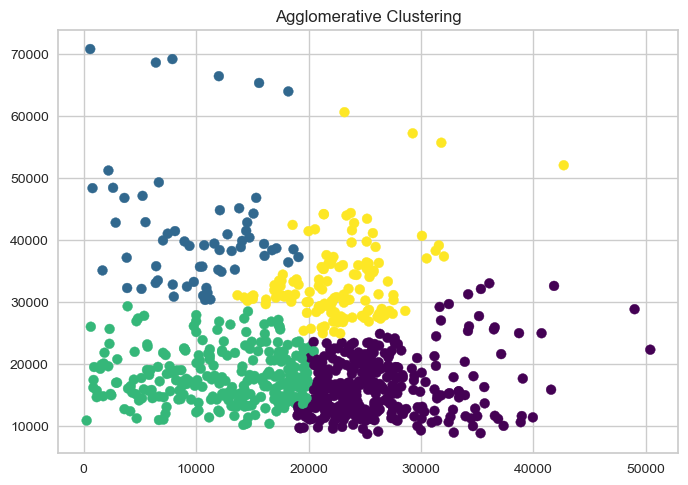

In [27]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
# 4 kümeli bir hiyerarşik kümeleme modeli (Agglomerative Clustering) oluşturur.

y_agg = agg_clustering.fit_predict(x)
# Modeli veriye uygular ve her gözlem için küme etiketini tahmin eder.

# Sonuçları görselleştir
plt.scatter(x.Mileage, x.Price, c=y_agg, s=50, cmap='viridis')
# Mileage ve Price değişkenlerini kullanarak noktaları çizer.
# Renkler (c=y_agg) kümelere göre belirlenir, cmap='viridis' renk skalasıdır.

plt.title("Agglomerative Clustering")
# Grafiğe başlık ekler.

plt.show()
# Grafiği ekranda gösterir.

#### _Yeni Data_

In [28]:
df = pd.read_csv('Billionaires.csv')

# 'Billionaires.csv' dosyasını okur ve veriyi pandas DataFrame olarak 'df' değişkenine yükler.
# Veri üzerinde analiz ve görselleştirme işlemleri bu DataFrame üzerinden yapılır.

In [29]:
df.head()

# Veri setinin ilk 5 satırını görüntüler.
# Sütun adlarını ve verinin genel yapısını hızlıca incelemek için kullanılır.

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


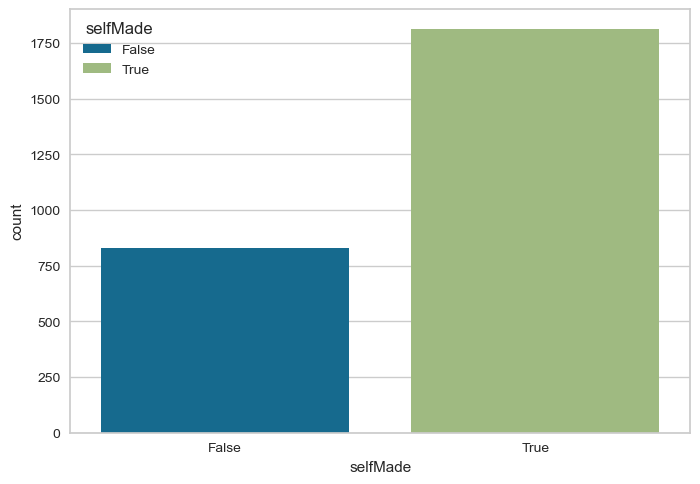

In [30]:
sns.countplot(x=df['selfMade'], hue=df['selfMade']);

# 'selfMade' sütunundaki değerlerin (örneğin 'True' / 'False') sayısını çubuk grafikle gösterir.
# hue parametresi aynı sütunla verildiği için çubuklar renkli olarak ayrılır.
# Bu grafik, milyarderlerin kendi servetini mi yoksa mirasla mı edindiğini görselleştirir.

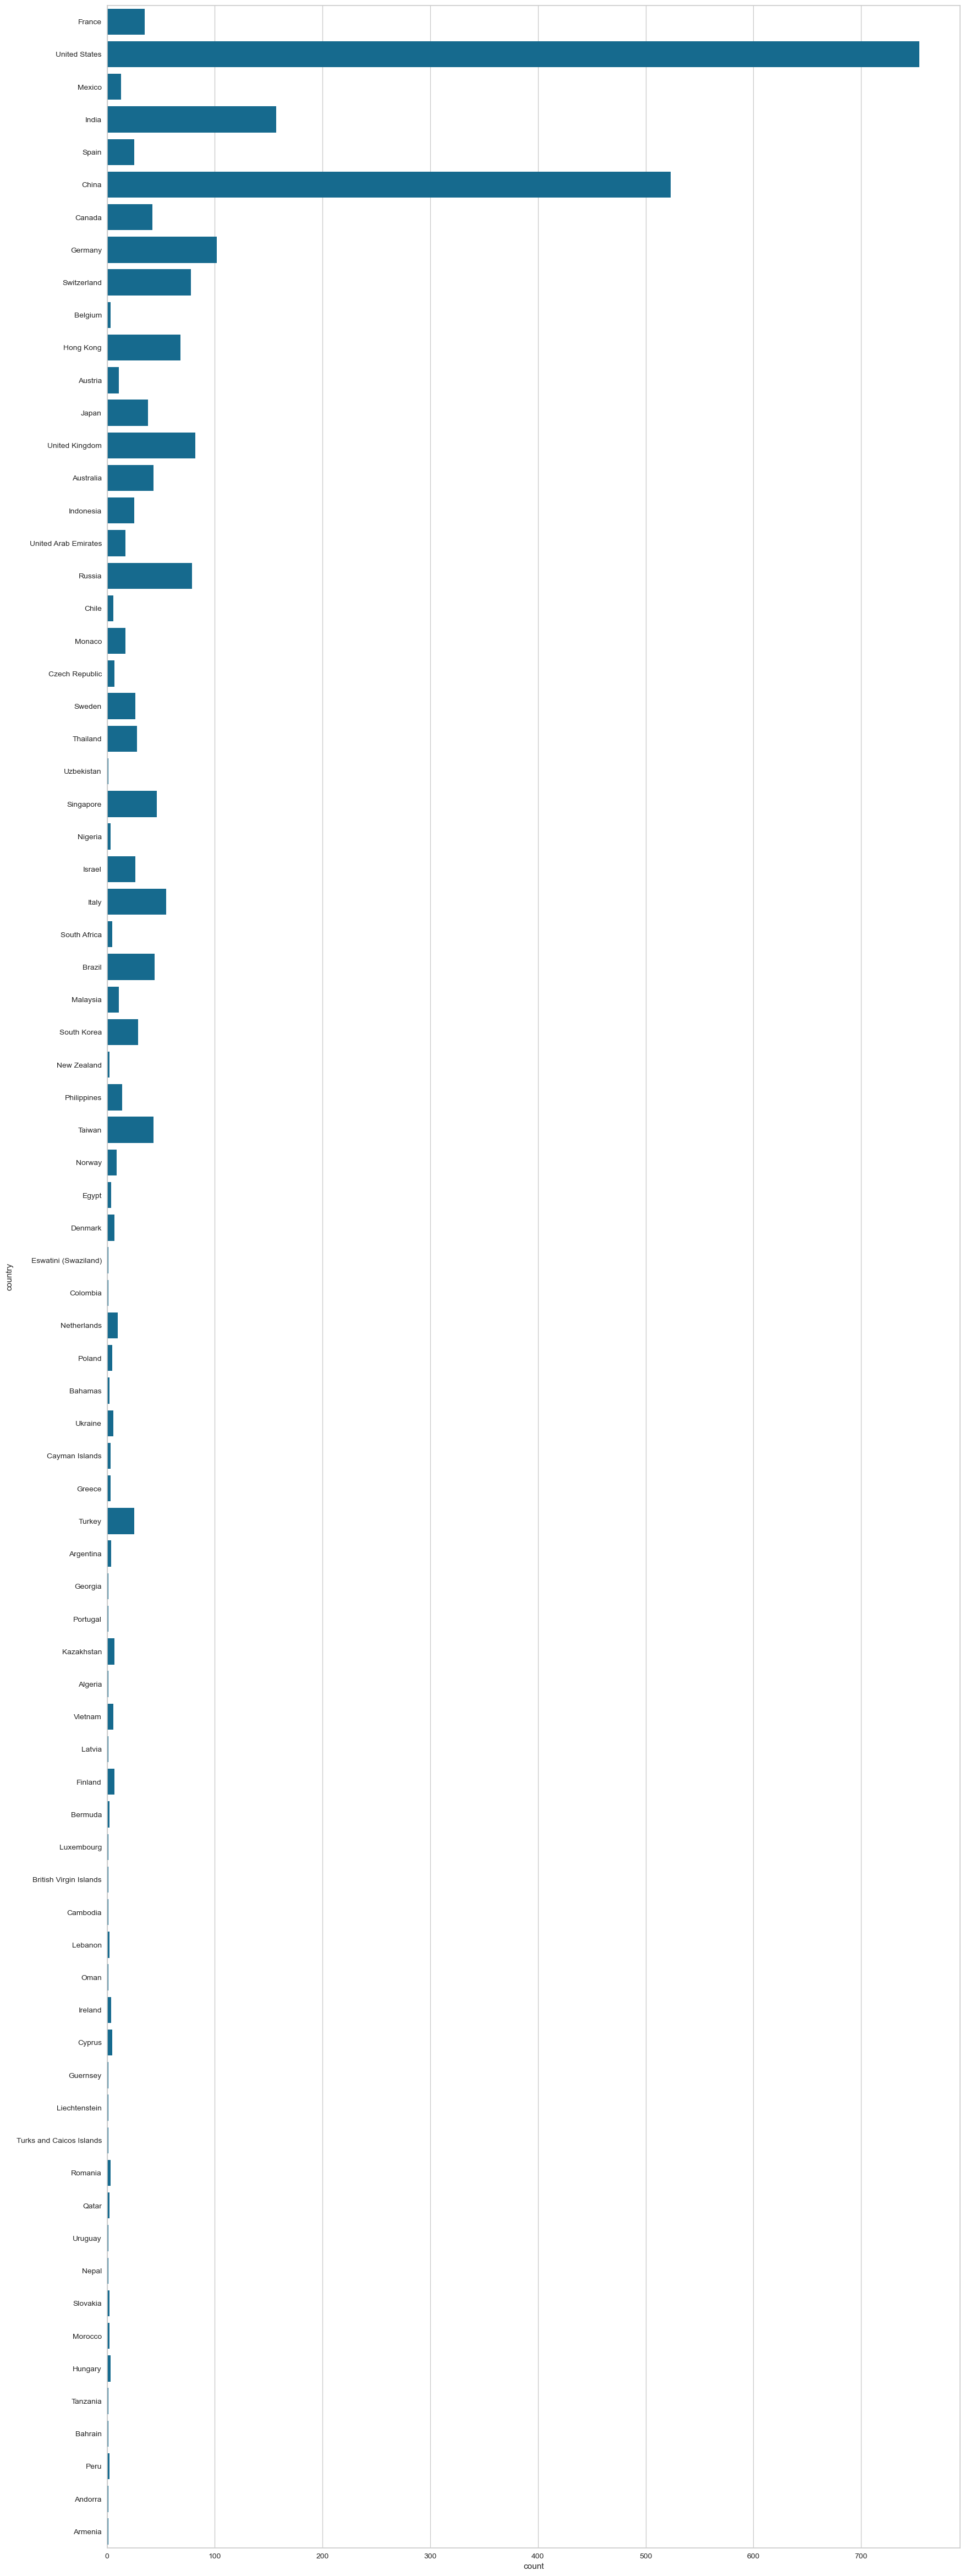

In [31]:
plt.figure(figsize=(20,60))
# Grafiğin boyutunu 20x60 inç olarak ayarlar (çok sayıda ülke olduğundan dikey uzun tutulur).

sns.countplot(y=df['country']);
# 'country' sütunundaki ülkelere göre milyarder sayısını yatay çubuk grafikte gösterir.
# Hangi ülkede kaç milyarder olduğu bu grafikle kolayca görülebilir

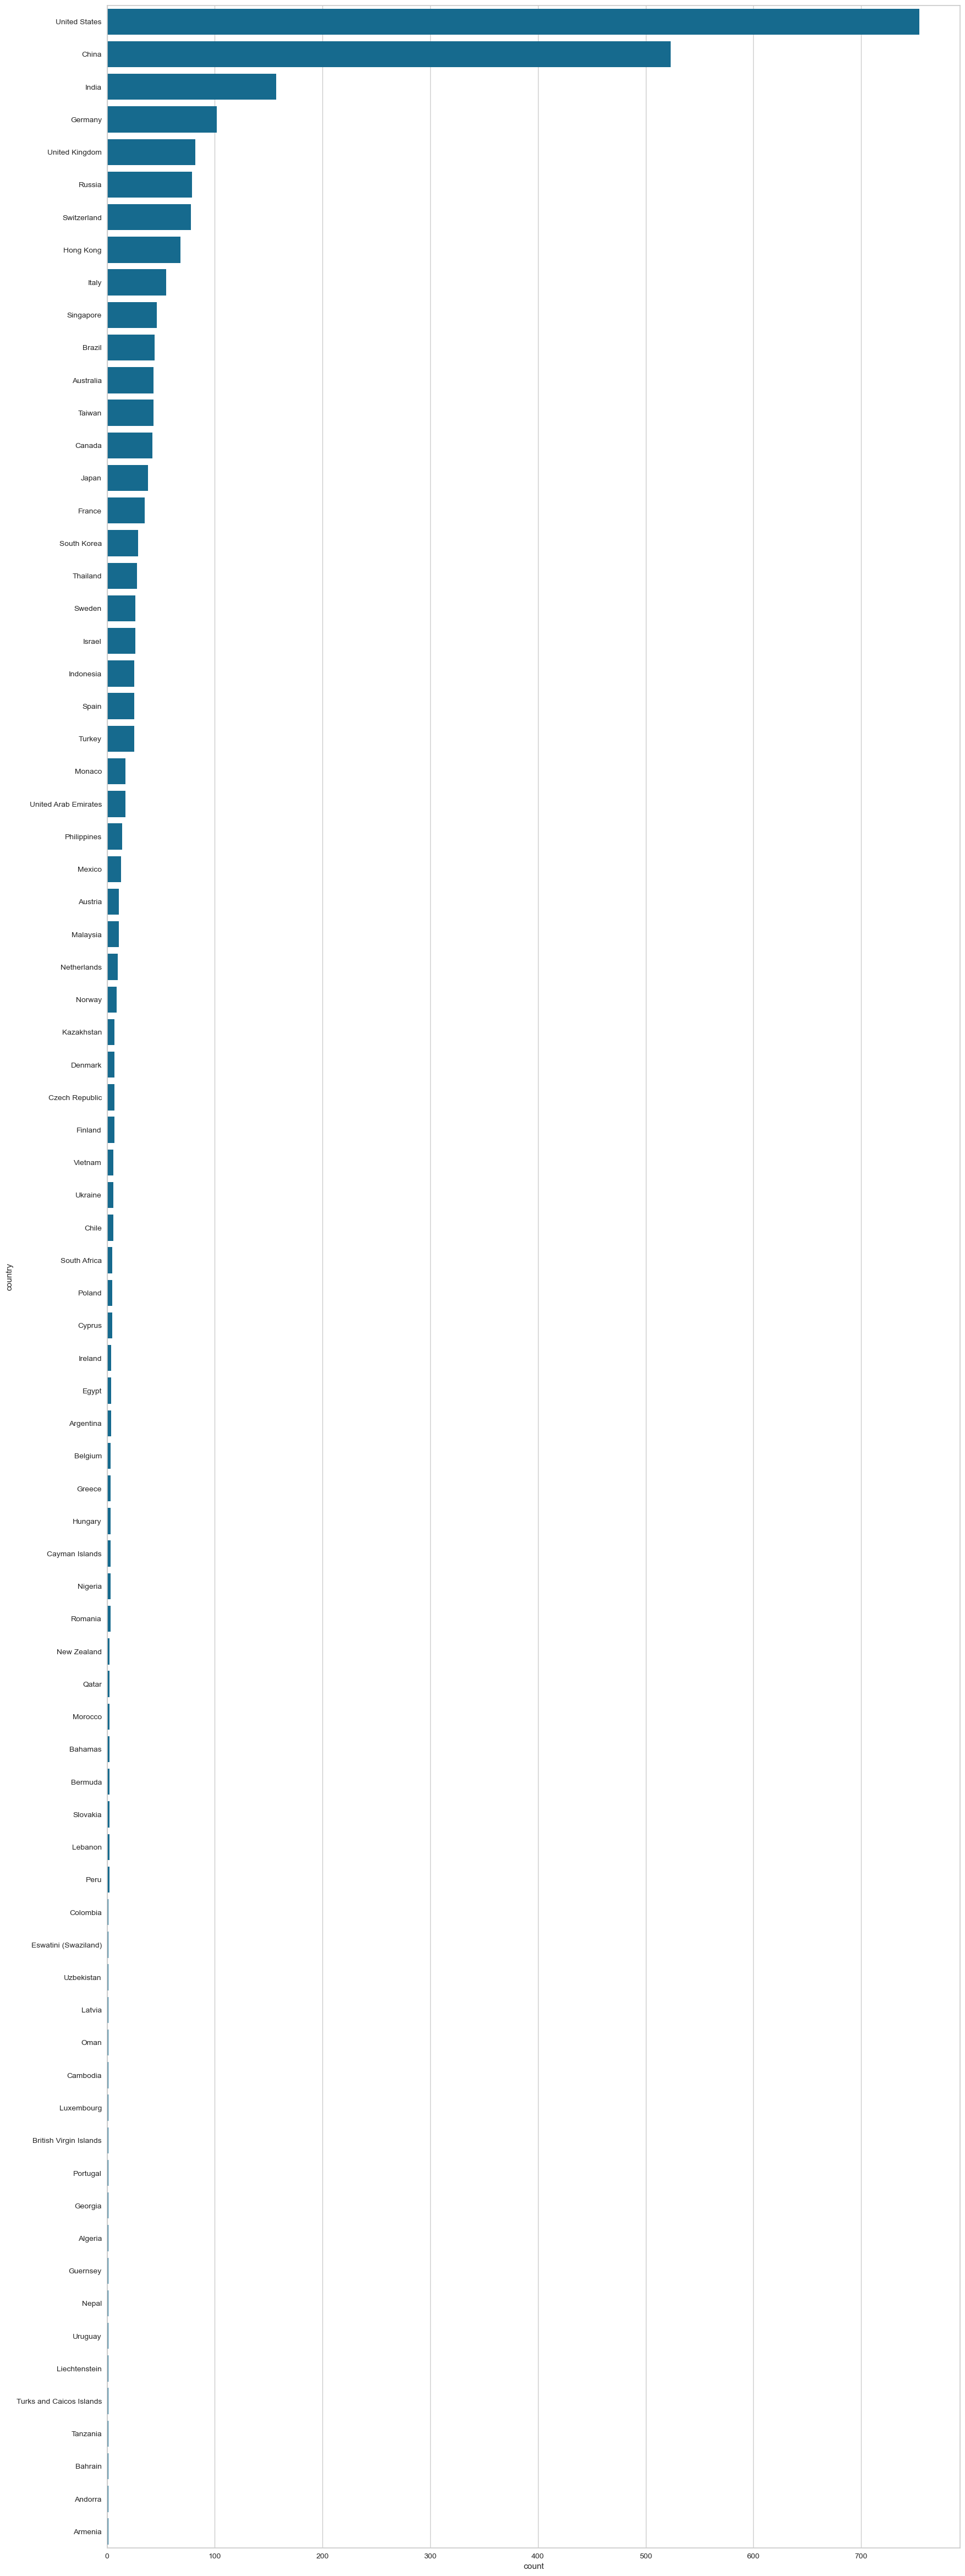

In [32]:
ydf = df['country'].value_counts().sort_values(ascending=False)
# Ülkeleri milyarder sayısına göre sayar ve en çoktan en aza sıralar.

plt.figure(figsize=(20,60))
# Grafiğin boyutunu geniş (20x60 inç) olarak ayarlar.

sns.countplot(y=df['country'], order=ydf.index);
# Ülkeleri milyarder sayısına göre sıralı biçimde yatay çubuk grafikte gösterir.
# En çok milyardere sahip ülke grafiğin üst kısmında yer alır.

In [33]:
tr = df[df['country'] == 'Turkey']

# Veri setinden yalnızca 'Turkey' ülkesine ait satırları filtreler.
# Böylece sadece Türk milyarderleri içeren bir alt veri seti oluşturulur.

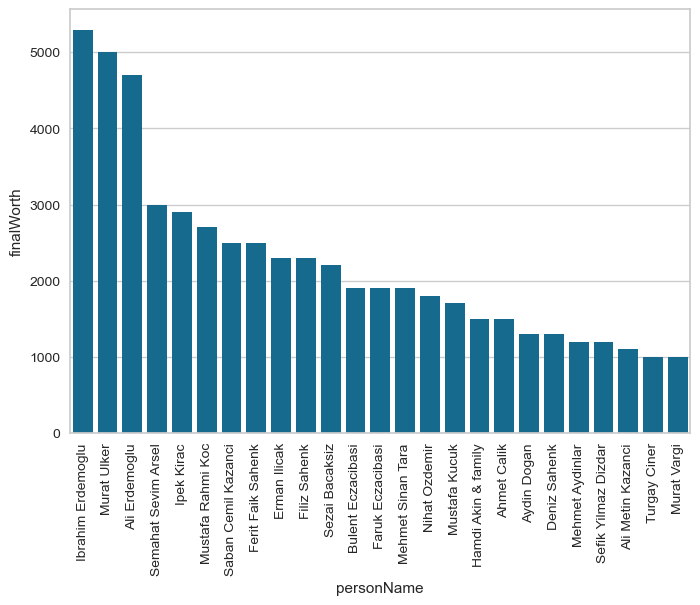

In [34]:
sns.barplot(x=tr['personName'], y=tr['finalWorth'])
# Türk milyarderlerin isimlerini (x ekseni) ve servetlerini (y ekseni) çubuk grafikte gösterir.

plt.xticks(rotation=90);
# İsimleri 90 derece döndürür, böylece uzun isimler daha okunabilir hale gelir.

_Bu projede farklı clustering modelleri kullanarak arabaları benzerliklerine göre gruplara ayırdık._